In this tutorial we will explore the SklearnNode. The sklearn node is a readout node similar to the 
native ridge node, suitable for offline learning. However, it incorporates a host of Sklearn's liner estimators
suitable for various classification and regression tasks. 

Currently we support Linear classifiers like LogisticRegression, Perceptron, 
RidgeClassifier and Linear regressors like Ridge, LinearRegression
Lasso and ElasticNet.

For more information on the above mentioned estimators, please visit sklearn linear model [API reference](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model)


### SklearnNode usage

In [1]:
import sys
sys.path.insert(0, '../')
from reservoirpy.nodes import SklearnNode
readout = SklearnNode(method="Ridge", alpha=1e-3)

The hyper parameters can be selected by looking at the documentation of each method.

Let's try the classic sinewave forecasting task from the tutorial 1. 

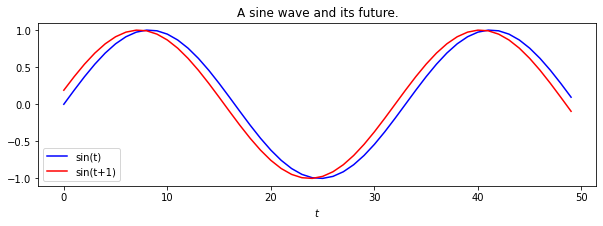

In [2]:
import numpy as np
import matplotlib.pyplot as plt

X = np.sin(np.linspace(0, 6*np.pi, 100)).reshape(-1, 1)
X_train = X[:50]
Y_train = X[1:51]
X_test, Y_test = X[50:len(X)-1], X[51:len(X)] 
plt.figure(figsize=(10, 3))
plt.title("A sine wave and its future.")
plt.xlabel("$t$")
plt.plot(X_train, label="sin(t)", color="blue")
plt.plot(Y_train, label="sin(t+1)", color="red")
plt.legend()
plt.show()

Let's create a reservoir node and add our sklearn ridge method to it. This will give
us the ESN model.

In [11]:
from reservoirpy.nodes import Input, Reservoir

reservoir = Reservoir(100, lr=0.5, sr=0.9)
esn_model = reservoir >> readout
print(X_train.shape)
print(y_train.shape)
res = esn_model.fit(X_train, Y_train)
Y_pred = esn_model.run(X_test)
plt.figure(figsize=(10, 3))
plt.title("A sine wave and its future.")
plt.xlabel("$t$")
plt.plot(Y_pred, label="Predicted sin(t)", color="blue")
plt.plot(Y_test, label="Real sin(t+1)", color="red")
plt.legend()
plt.show()

(1, 50)
(1, 10)


Running Model-9: 100%|█████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 369.77it/s]

Fitting node SklearnNode-4...


ValueError: cannot reshape array of size 50 into shape (1,1)

Pretty Awesome right? Now we can import different regression models from sklearn library and use it to forecast or predict from time-series data. :)

Let's try other linear estimators like Lasso or ElasticNet. But predcicting since wave can be bore. Let's do something more exciting.  Let's create a more challenging synthetic time series dataset for forecasting. We'll use a combination of sine and cosine waves with different frequencies and amplitudes, as well as added noise to make the dataset more complex. 

In [30]:
import numpy as np

# Function to generate synthetic time series data for forecasting
def generate_time_series_forecasting_data(num_samples, input_time_steps, output_time_steps, noise_factor=0.1):
    total_time_steps = input_time_steps + output_time_steps
    full_data = np.sin(np.linspace(0, (num_samples + total_time_steps) * 2 * np.pi / num_samples, num_samples + total_time_steps)) + noise_factor * np.random.randn(num_samples + total_time_steps)

    X = np.zeros((num_samples, input_time_steps, 1))
    y = np.zeros((num_samples, output_time_steps, 1))

    for i in range(num_samples):
        X[i, :, 0] = full_data[i:i + input_time_steps]
        y[i, :, 0] = full_data[i + input_time_steps:i + total_time_steps]

    return X, y

# Generate the dataset
num_samples = 1000
input_time_steps = 50
output_time_steps = 2
X, y = generate_time_series_forecasting_data(num_samples, input_time_steps, output_time_steps)

# Now, 'X' contains the input time series data and 'y' contains the corresponding target values for forecasting


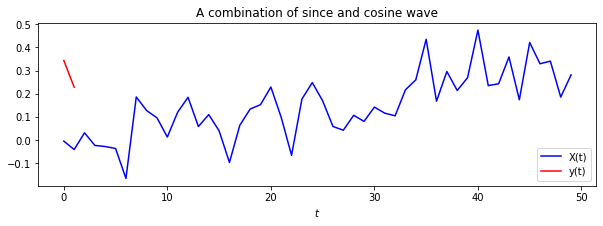

In [31]:
plt.figure(figsize=(10, 3))
plt.title("A combination of since and cosine wave")
plt.xlabel("$t$")
plt.plot(X[1], label="X(t)", color="blue")
plt.plot(y[1], label="y(t)", color="red")
plt.legend()
plt.show()

The above function takes number of samples, number of time-steps 1000 samples, where each input sample has 150 time steps, and the output has also has 150 time steps (one-step ahead forecasting). The X array and y array have the shape (1000, 50, 1)

You can adjust the num_samples, input_time_steps, output_time_steps, and noise_factor variables to customize the dataset generation.

Now lets split our data into train and test on the basis of number of samples. Lets have 800 samples to train our esn model, while testing on the rest 200

In [32]:
from reservoirpy.utils.sklearn_helper import check_sklearn_dim
source = Input()
reservoir = Reservoir(100)
readout = SklearnNode(method="Ridge", alpha=1e-3)
esn = source >> reservoir >> readout
print(X.shape)
print(y.shape)
X, y = check_sklearn_dim(X, y, readout)
print(X.shape)
print(y.shape)
X_train, y_train = X[:900], y[:900]
X_test, y_test = X[900:], y[900:]

source = Input()
reservoir = Reservoir(100)
readout = SklearnNode(method="Ridge", alpha=1e-3)
esn = source >> reservoir >> readout
res = esn.fit(X_train, y_train)


(1000, 50, 1)
(1000, 2, 1)
(1000, 50, 1)
(1000, 2, 1)


Running Model-29:   0%|                                                                           | 0/900 [00:00<?, ?it/s]
Running Model-29: 3it [00:00, 2954.43it/s]                                                                                
Running Model-29:   0%|                                                                           | 0/900 [00:00<?, ?it/s]


IndexError: index 2 is out of bounds for axis 0 with size 2

Running Model-21: 100it [00:00, 3391.36it/s]                                                                              


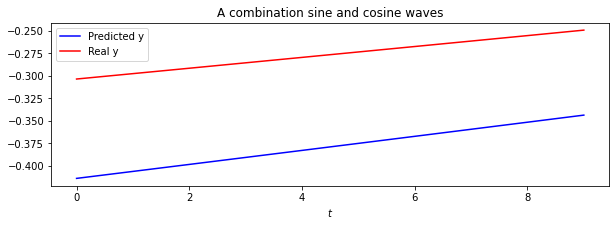

In [26]:
y_pred = esn.run(X_test)
plt.figure(figsize=(10, 3))
plt.title("A combination sine and cosine waves")
plt.xlabel("$t$")
plt.plot(y_pred[0], label="Predicted y", color="blue")
plt.plot(y_test[0], label="Real y", color="red")
plt.legend()
plt.show()